<a href="https://colab.research.google.com/github/Zubair-droid/Zubair-s-page/blob/master/Copy_of_img-classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install keras

In [0]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print (type(x_train))
print (type(y_train))
print (type(x_test))
print (type(y_test))




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
#Get the shapes
print("x_train: " , x_train.shape)
print("y_train: " , y_train.shape)
print("x_test: " , x_test.shape)
print("y_test: " , y_test.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [0]:
#take a look at the first image at index = 0 in the training dataset
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

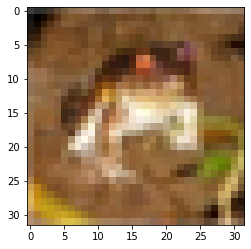

In [0]:
#Show image as picture
import matplotlib.pyplot as plt
img= plt.imshow(x_train[0])

In [0]:
#print the label of the image
print("The label is" ,y_train[0])

The label is [6]


In [0]:
#One  hot encoding: Converting the labels set into set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train) 
y_test_one_hot= to_categorical(y_test)

#print the new labels inthe training dataset
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#print an example of the new labels
print("The one hot label is" , y_train_one_hot[0])

The one hot label is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalising the data ,pixels into images to values between 0 and 1
x_train = x_train /255
x_test = x_test /255

In [0]:
#Buid the CNN 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

#Create the architecture
model = Sequential()

#Convolution layer
model.add(Conv2D(32,(5,5),activation = 'relu',input_shape = (32,32,3)) )

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer
model.add(Conv2D(32,(5,5),activation = 'relu',input_shape = (32,32,3)) )

#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())

model.add(Dense(1000, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))


In [0]:
#Compile the model

model.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics=['accuracy'])

In [0]:
#train the model
hist = model.fit(x_train,y_train_one_hot,batch_size = 256,epochs=10, validation_split = 0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.6750 - accuracy: 0.7655 - val_loss: 0.9965 - val_accuracy: 0.6686
Epoch 2/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.6077 - accuracy: 0.7892 - val_loss: 0.9951 - val_accuracy: 0.6729
Epoch 3/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.5444 - accuracy: 0.8122 - val_loss: 1.0305 - val_accuracy: 0.6653
Epoch 4/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.4874 - accuracy: 0.8315 - val_loss: 1.0777 - val_accuracy: 0.6626
Epoch 5/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.4202 - accuracy: 0.8567 - val_loss: 1.0895 - val_accuracy: 0.6654
Epoch 6/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.3648 - accuracy: 0.8779 - val_loss: 1.1148 - val_accuracy: 0.6708
Epoch 7/10
35000/35000 [==============================] - 48s 1ms/st

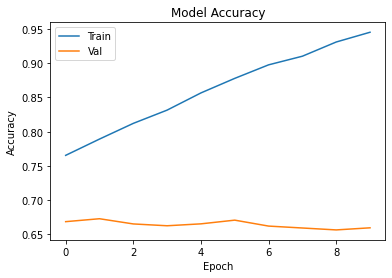

In [0]:
#Visualize the models accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc="upper left")
plt.show()

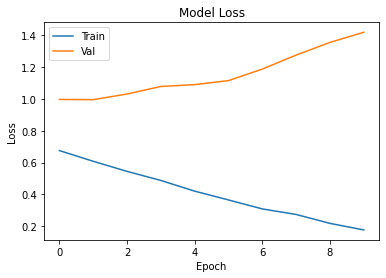

In [0]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc="upper left")
plt.show()


In [0]:
#Load the image data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread("tiger.jfif")

Saving tiger.jfif to tiger.jfif


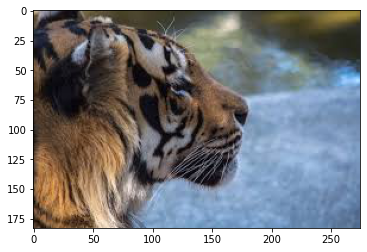

In [0]:
#Show the uploaded image
img = plt.imshow(my_image)

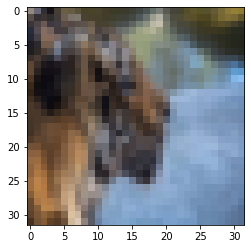

In [0]:
#Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image,(32,32,3))
img = plt.imshow(my_image_resized)

In [0]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

#Print the probablities
probabilities

array([[2.1194767e-04, 2.4496054e-05, 4.8712641e-03, 1.2977284e-01,
        7.9224817e-03, 8.5528666e-01, 1.8832022e-04, 1.6570560e-03,
        4.6479195e-06, 6.0320683e-05]], dtype=float32)

In [0]:
number_to_class = ['airplane',"automobile",'bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argsort(probabilities[0,:])
print("Most  likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[9]])
print("Second Most  likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[8]])
print("Third Most likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[7]])
print("Fourth Most likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[6]])
print("Fifth Most likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[5]])

Most  likely class:  dog --probability: 0.85528666
Second Most  likely class:  dog --probability: 0.12977284
Third Most likely class:  dog --probability: 0.007922482
Fourth Most likely class:  dog --probability: 0.004871264
Fifth Most likely class:  dog --probability: 0.001657056


In [0]:
#Save the model
model.save("my_model.h5")

In [0]:
#Load the model
from keras.models import load_model
model = load_model('my_model.h5')

In [0]:
#Load the image data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread("cat.jfif")

Saving cat.jfif to cat.jfif


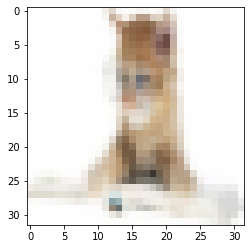

In [0]:
#Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image,(32,32,3))
img = plt.imshow(my_image_resized)

In [0]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

#Print the probablities
probabilities

array([[4.20995893e-05, 6.29044705e-10, 3.14860325e-03, 9.31994259e-01,
        1.30701956e-05, 6.37940988e-02, 1.04202154e-04, 3.15399608e-04,
        5.87419199e-04, 8.68645202e-07]], dtype=float32)

In [0]:
number_to_class = ['airplane',"automobile",'bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argsort(probabilities[0,:])
print("Most  likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[9]])
print("Second Most  likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[8]])
print("Third Most likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[7]])
print("Fourth Most likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[6]])
print("Fifth Most likely class: ", number_to_class[index[9]], '--probability:',probabilities[0 ,index[5]])

Most  likely class:  cat --probability: 0.93199426
Second Most  likely class:  cat --probability: 0.0637941
Third Most likely class:  cat --probability: 0.0031486033
Fourth Most likely class:  cat --probability: 0.0005874192
Fifth Most likely class:  cat --probability: 0.0003153996
